In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
Data = pd.read_csv("restaurant_reviews_anonymized.csv",encoding="latin1")
classA = Data[Data["Real"]==0]
classB = Data[Data["Real"]==1]

classA_numeric = classA.iloc[:,4:17]
classB_numeric = classB.iloc[:,4:17]
def spread_class(data):
  return np.std(data,axis=0)

def distance_interclass(mean1,mean2):
  return np.linalg.norm(mean1-mean2)
    
def feature_mean(data):
  return np.mean(data,axis=0)


classA_centroid=feature_mean(classA_numeric)
classB_centroid=feature_mean(classB_numeric)

print("Fake Revies Class: ",np.array(feature_mean(classA_numeric)))
print("Real Reviews Class : ",np.array(feature_mean(classB_numeric)))
print("class spread of fake reviews : ",np.array(spread_class(classA_numeric)))
print("class spread of real reviews : ",np.array(spread_class(classB_numeric)))
print("Class distance between fake and real reviews : ",distance_interclass(classA_centroid, classB_centroid))


Fake Revies Class:  [ 3.83685651  1.26796925  9.6613621  14.76177434  5.45454545 77.52727273
  8.74545455  6.09090909  0.25454545  0.63040107  0.88562523  8.21100622
  0.76276155]
Real Reviews Class :  [ 3.8781521   1.6520921  10.97941499 14.59558648  6.56363636 93.58181818
  9.          9.54545455  0.10909091  0.72885383  0.9017434   7.28489112
  0.7852815 ]
class spread of fake reviews :  [ 0.26685377  0.2857272   2.87227466  3.39552788  1.9336088  23.0784075
  4.12186269  2.98647087  0.51232737  0.30052264  0.07660491  2.29722554
  0.06154783]
class spread of real reviews :  [ 0.33489991  0.77862383  5.02158047  6.70213339  3.32901097 59.2034062
  7.17318238  6.67646663  0.31175324  0.30788034  0.06780521  4.06564393
  0.09995452]
Class distance between fake and real reviews :  16.54631782866717


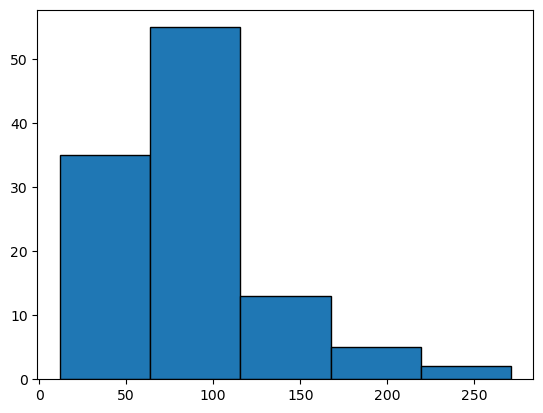

Mean of F6-Nwo: 85.55454545454545
The variance of the given feature F6-NWO: 2083.2652066115706


In [11]:
def mean_and_var(feature):
  Mean=np.mean(feature)
  Variance=np.var(feature)
  return Mean,Variance

def plot(Data,Bins):
  plt.hist(Data,bins=Bins,edgecolor="black")
  plt.show()

target_feauture=Data["F6-NWO"]
plot(target_feauture,5)

values=mean_and_var(target_feauture)
print("Mean of F6-Nwo:",values[0])
print("The variance of the given feature F6-NWO:",values[1])

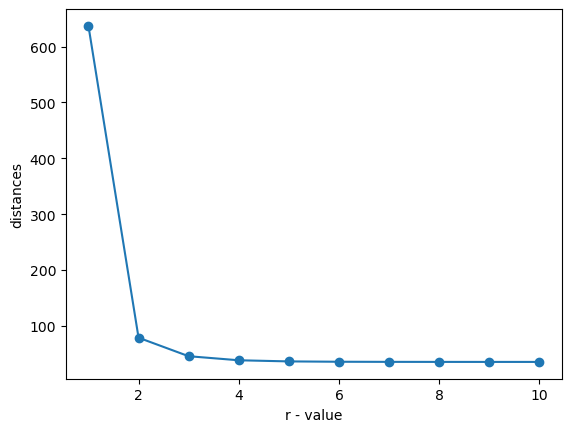

In [26]:
def Minkwoski(data1,data2,order):
  return np.linalg.norm(data1-data2,ord = order)

def obs_plot(data1 , data2):
  distances=[Minkwoski(data1,data2,i) for i in range(1,11)]
  r=list(range(1,11))
  plt.plot(r,distances,'-o' )
  plt.xlabel("r - value")
  plt.ylabel("distances")
  plt.plot

f1=Data["F3-ANP"]
f2=Data["F4-ASL"]

obs_plot(f1,f2)

In [28]:
X = Data.iloc[:,4:17]
y = Data["Real"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("x_train ",X_train.shape)
print("x_test ",X_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (77, 13)
x_test  (33, 13)
y_train  (77,)
y_test  (33,)


In [31]:
neigh = knn(n_neighbors=3)
neigh.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [34]:
accuracy = neigh.score(X_test,y_test)
print("Model accuracy is",accuracy)

Model accuracy is 0.7878787878787878


In [36]:
y_pred = neigh.predict(X_test)

print("First 10 predicted labels:", y_pred[:10])
print("First 10 actual labels:", y_test.values[:10])


First 10 predicted labels: [0 1 0 0 1 1 0 0 0 1]
First 10 actual labels: [0 1 0 0 1 1 0 1 0 1]


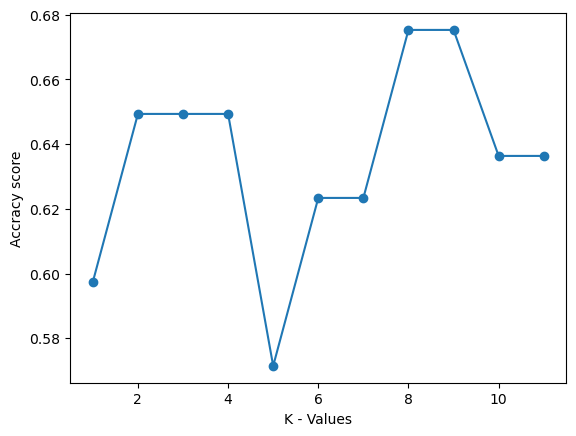

In [38]:
def knn_accuracy_plot(X_train,X_test,y_train,y_test):
  accuracy_scores=[]
  k = list(range(1,12))
  for i in range(1,12):
    neighT = knn(n_neighbors=i)
    neighT.fit(X_test,y_test)
    accuracy = neighT.score(X_train,y_train)
    accuracy_scores.append(accuracy)

  plt.plot(k,accuracy_scores,'-o')
  plt.xlabel("K - Values")
  plt.ylabel("Accracy score")
  plt.show()


knn_accuracy_plot(X_train,X_test,y_train,y_test)

In [41]:
y_train_pred = neigh.predict(X_train)
y_test_pred = neigh.predict(X_test)

conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix - Train Data:\n", conf_matrix_train)
print("\nConfusion Matrix - Test Data:\n", conf_matrix_test)
print("The report for trainng dat is :\n",classification_report(y_train, y_train_pred))
print("The report for test dat is :\n",classification_report(y_test, y_test_pred))


Confusion Matrix - Train Data:
 [[31  9]
 [ 7 30]]

Confusion Matrix - Test Data:
 [[13  2]
 [ 5 13]]
The report for trainng dat is :
               precision    recall  f1-score   support

           0       0.82      0.78      0.79        40
           1       0.77      0.81      0.79        37

    accuracy                           0.79        77
   macro avg       0.79      0.79      0.79        77
weighted avg       0.79      0.79      0.79        77

The report for test dat is :
               precision    recall  f1-score   support

           0       0.72      0.87      0.79        15
           1       0.87      0.72      0.79        18

    accuracy                           0.79        33
   macro avg       0.79      0.79      0.79        33
weighted avg       0.80      0.79      0.79        33

